<a href="https://colab.research.google.com/github/juancuadrado/Juan_Cuadrado_test/blob/main/Caso_Materias_Primas_C_DOE_DCA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías Básicas para Diseño de Experimentos**

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
!pip install bioinfokit &> /dev/null
from bioinfokit.analys import stat as st
!pip install pingouin &> /dev/null
import pingouin as pg

#  **Tema 1: Diseños Completos Aleatorizados - DCA usando Python: Versión 2**</span>

### <span style="color:blue"> **Problema: _Problema 1: Una compañía compra materia prima a tres proveedores. La pureza de esta materia prima es un importante en la calidad del producto terminado. El departamento de calidad quiere determinar si existen diferencias en la pureza de la materia prima debido al proveedor. Se selecciona al azar 4 muestras de materia prima de cada proveedor de la última compra realizada en el mes, los resultados fueron los siguientes._:**</span>

### <span style="color:blue">**Tabla de datos**</span>


|Proveedor||Pureza materia prima|||
|:--:|:--:|:--:|:--:|:--:|
|A|94|95| 93|96|
|B|88| 92|86|87|
|C|95|96|96|92|


## **1.3 Los datos en Python y definimos el DataFrame: Ingresamos los datos como columnas**

In [131]:
## **1.3 Los datos en Python y definimos el DataFrame: Ingresamos los datos como columnas**
datos = [[94, 88, 95],
         [95, 92, 96],
         [93, 86, 96],
         [96, 87, 92]]

columnas = ['A', 'B', 'C'] # definimos los nombres de las columnas
filas = ['F1', 'F2', 'F3', 'F4'] # definimos los nombres de las filas

df = pd.DataFrame(datos, columns=columnas, index=filas)
df.T

,F1,F2,F3,F4
A,94,95,93,96
B,88,92,86,87
C,95,96,96,92


## **1.4 Verificando que los datos coinciden con la tabla**

In [132]:
## **1.4 Verificando que los datos coinciden con la tabla**
print(df)

     A   B   C
F1  94  88  95
F2  95  92  96
F3  93  86  96
F4  96  87  92


In [133]:
df.describe()

,A,B,C
count,4.000000,4.000000,4.000000
mean,94.500000,88.250000,94.750000
std,1.290994,2.629956,1.892969
min,93.000000,86.000000,92.000000
25%,93.750000,86.750000,94.250000
50%,94.500000,87.500000,95.500000
75%,95.250000,89.000000,96.000000
max,96.000000,92.000000,96.000000


# **1.5 Organizando adecuadamente la Tabla**

In [134]:
# **1.5 Organizando adecuadamente la Tabla**
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C'])
# replace column names
df_melt.columns = ['index', 'treatments', 'Pureza_Materia_Prima']
print(df_melt)


   index treatments  Pureza_Materia_Prima
0     F1          A                    94
1     F2          A                    95
2     F3          A                    93
3     F4          A                    96
4     F1          B                    88
5     F2          B                    92
6     F3          B                    86
7     F4          B                    87
8     F1          C                    95
9     F2          C                    96
10    F3          C                    96
11    F4          C                    92


In [135]:
df_melt.describe()

,Pureza_Materia_Prima
count,12.000000
mean,92.500000
std,3.630677
min,86.000000
25%,91.000000
50%,93.500000
75%,95.250000
max,96.000000


In [136]:
df_melt.groupby('treatments')['Pureza_Materia_Prima'].agg(['mean','std','min', 'max'])

,mean,std,min,max
treatments,,,,
A,94.50,1.290994,93,96
B,88.25,2.629956,86,92
C,94.75,1.892969,92,96


In [137]:
df_melt.groupby('treatments')['Pureza_Materia_Prima'].quantile([.25,.5,.75])

treatments      
A           0.25    93.75
            0.50    94.50
            0.75    95.25
B           0.25    86.75
            0.50    87.50
            0.75    89.00
C           0.25    94.25
            0.50    95.50
            0.75    96.00
Name: Pureza_Materia_Prima, dtype: float64

## **1.6 Generemos los boxplot para el desgaste con los diferentes tipos de cuero**

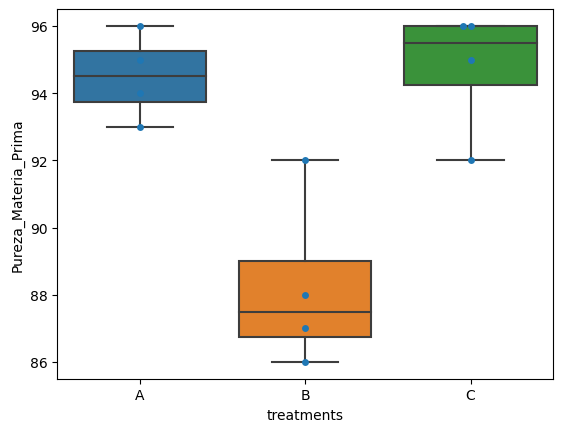

In [138]:
## **1.6 Generemos los boxplot para el desgaste con los diferentes tipos de cuero**
ax = sns.boxplot(x='treatments', y='Pureza_Materia_Prima', data=df_melt)
ax = sns.swarmplot(x="treatments", y="Pureza_Materia_Prima", data=df_melt)
plt.show()

## **1.7 Las funciones _stats f_oneway_ toman los grupos como entrada y devuelven el valor ANOVA F y p - value**

In [139]:
## **1.7 Las funciones _stats f_oneway_ toman los grupos como entrada y devuelven el valor ANOVA F y p - value**
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'])
print(fvalue, pvalue)

13.376712328767123 0.0020144749903156143


# **Obtener la tabla ANOVA como R como salida**

## **1.8 Obtener la tabla ANOVA como R como salida - Modelo de mínimos cuadrados ordinarios (OLS)**

In [140]:
## **1.8 Obtener la tabla ANOVA como R como salida - Modelo de mínimos cuadrados ordinarios (OLS)**
model = ols('Pureza_Materia_Prima ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,35721.0,1.0,8807.917808,8.976906e-15
C(treatments),108.5,2.0,13.376712,2.014475e-03
Residual,36.5,9.0,NaN,NaN


## **1.9 *texto en cursiva* Obtener la tabla ANOVA como R como salida - Modelo de mínimos cuadrados ordinarios (OLS)**

In [141]:
## **1.9 *texto en cursiva* Obtener la tabla ANOVA como R como salida - Modelo de mínimos cuadrados ordinarios (OLS)**
res = stat()
res.anova_stat(df=df_melt, res_var='Pureza_Materia_Prima', anova_model='Pureza_Materia_Prima ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,108.5,54.250000,13.376712,0.002014
Residual,9.0,36.5,4.055556,NaN,NaN


## **1.10 Realizar una comparación múltiple por pares (HSD de Tukey)**

In [142]:
## **1.10 Realizar una comparación múltiple por pares (HSD de Tukey)**
res = stat()
res.tukey_hsd(df=df_melt, res_var='Pureza_Materia_Prima', xfac_var='treatments', anova_model='Pureza_Materia_Prima ~ C(treatments)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:412: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:412: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:412: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,6.25,2.277508,10.222492,6.207044,0.004442
1,A,C,0.25,-3.722492,4.222492,0.248282,0.900000
2,B,C,6.50,2.527508,10.472492,6.455326,0.003463


group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-6.25,0.0045,-10.2258,-2.2742,True
A,C,0.25,0.9832,-3.7258,4.2258,False
B,C,6.5,0.0035,2.5242,10.4758,True


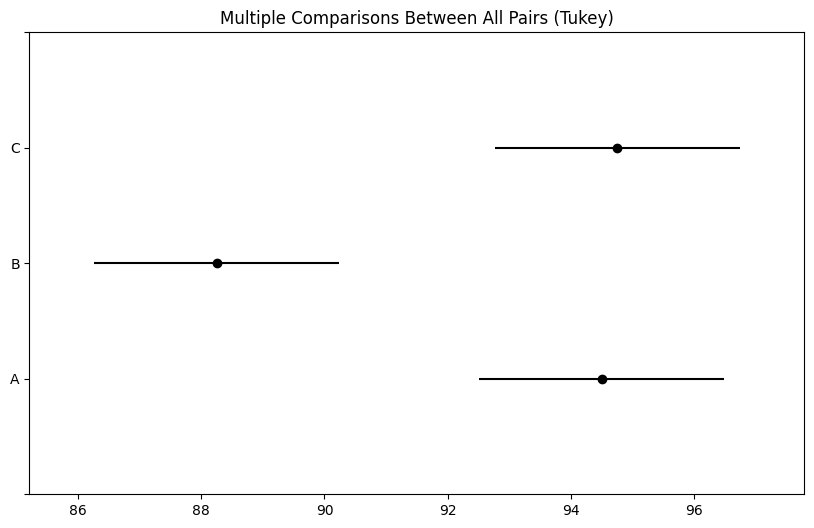

In [143]:
# **Comparaciones Múltiples**
tukey = pairwise_tukeyhsd(endog=df_melt["Pureza_Materia_Prima"],     # Data
                          groups=df_melt["treatments"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

# **Pruebe los supuestos de ANOVA**
## **1.12 Normalidad: QQ-plot**

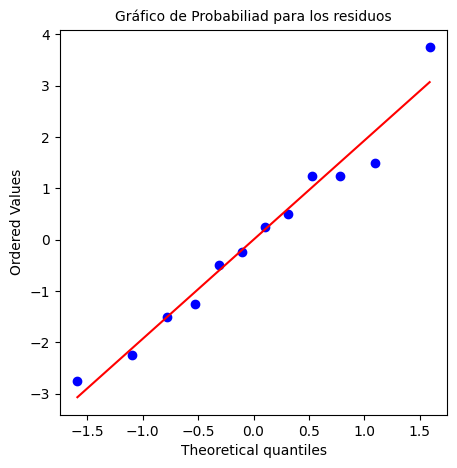

In [144]:

# **Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= False)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

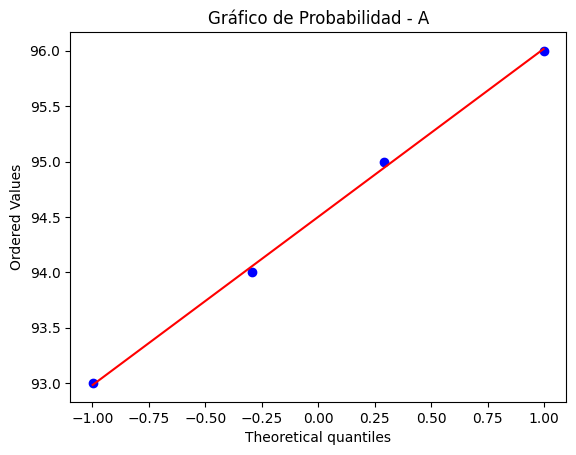

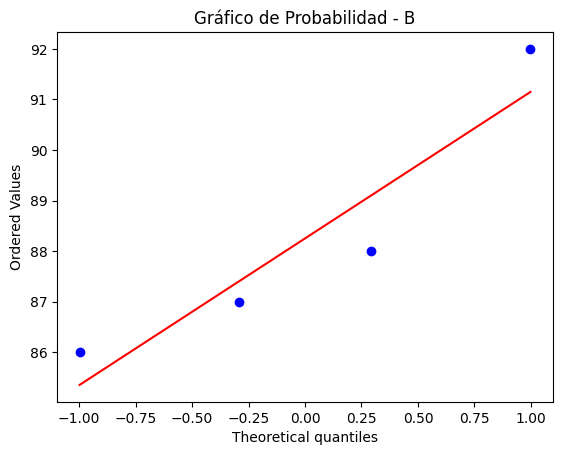

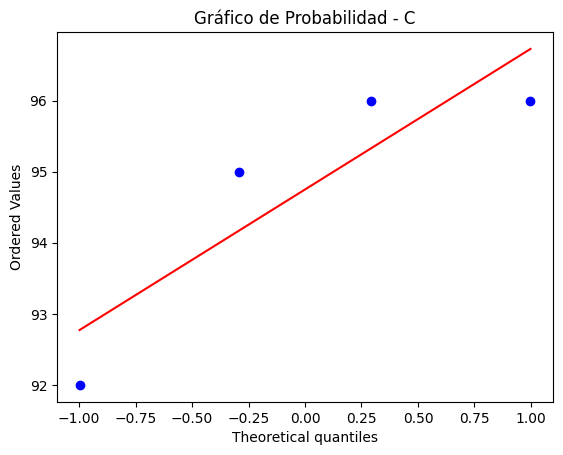

In [145]:
unique_tipo_provedor  = df_melt['treatments'].unique()
for Tipo_provedor in unique_tipo_provedor:
    stats.probplot(df_melt[df_melt['treatments'] == Tipo_provedor]['Pureza_Materia_Prima'], dist="norm", plot=plt)
    plt.title("Gráfico de Probabilidad - "+Tipo_provedor)
    plt.show()


## **1.13 Normalidad:  Histograma**

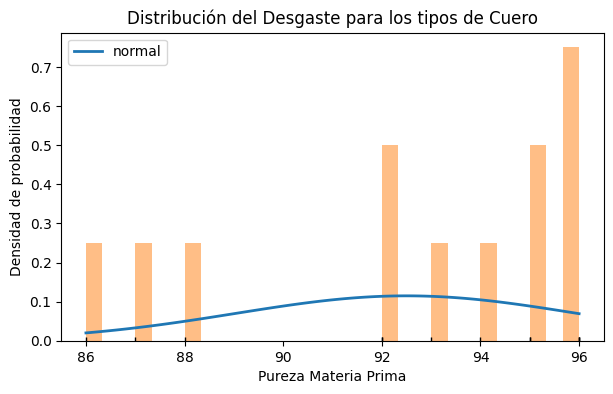

In [146]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(df_melt['Pureza_Materia_Prima'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(df_melt['Pureza_Materia_Prima']), max(df_melt['Pureza_Materia_Prima']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=df_melt['Pureza_Materia_Prima'], density=True, bins=30,  alpha=0.5)
ax.plot(df_melt['Pureza_Materia_Prima'], np.full_like(df_melt['Pureza_Materia_Prima'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del Desgaste para los tipos de Cuero')
ax.set_xlabel('Pureza Materia Prima')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [147]:
def sturges(data):
    num_data = len(data)
    num_bins = np.round(np.log2(num_data)) + 1
    return int(num_bins)
def freedman_diaconis(data):
    num_data = len(data)
    irq = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * irq / np.power(num_data, 1/3)
    num_bins = np.int((np.max(data) -  np.min(data)) / bin_width)  + 1
    return num_bins

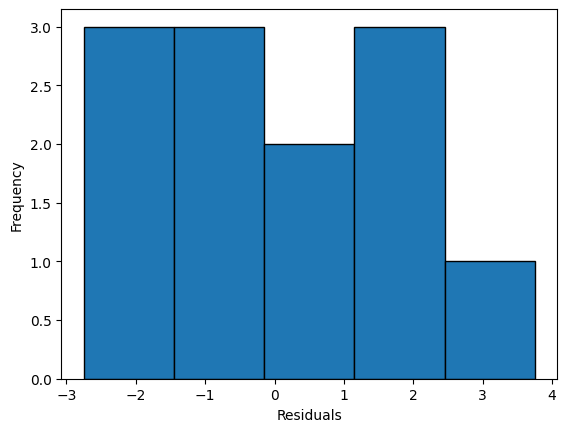

In [148]:
## **1.13 Normalidad:  Histograma**
#plt.hist(res.anova_model_out.resid, bins=sturges(res.anova_model_out.resid), histtype='bar', ec='k')
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

## **1.14 Normalidad - Prueba de Shapiro-Wilk**

In [149]:
#1.14 Normalidad - Prueba de Shapiro-Wilk
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)
print('Cual es el estadistico de Prueba para shapiro-wilk w = ', w)
print('El valor p para el estadistico de Prueba es p_value = ', pvalue)
print('Para que se cumpla el supuesto de normalidad se debe cumplir que el p_value = ', f'{pvalue} > 0.05')

0.9716333150863647 0.927138090133667
Cual es el estadistico de Prueba para shapiro-wilk w =  0.9716333150863647
El valor p para el estadistico de Prueba es p_value =  0.927138090133667
Para que se cumpla el supuesto de normalidad se debe cumplir que el p_value =  0.927138090133667 > 0.05


## **1.15 Homocedasticidad - Prueba de Bartlett**

In [150]:
## **1.15 Homocedasticidad - Prueba de Bartlett**
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'])
print(w, pvalue)

1.2521293602644783 0.534691849573989


## **1.16 Homocedasticidad - Prueba de Bartlett: Otra forma**

In [154]:
## **1.15 Homocedasticidad - Prueba de Bartlett: Otra forma**
res = st()
res.bartlett(df=df_melt, res_var='Pureza_Materia_Prima', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),1.2521
1,Degrees of freedom (Df),2.0000
2,p value,0.5347


## **1.17 Homocedasticidad - Prueba de Levene**

In [155]:
## **1.17 Homocedasticidad - Prueba de Levene**
res = st()
res.levene(df=df_melt, res_var='Pureza_Materia_Prima', xfac_var='treatments')
res.levene_summary
# output

,Parameter,Value
0,Test statistics (W),0.2838
1,Degrees of freedom (Df),2.0000
2,p value,0.7594
